In [463]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import numpy as np

In [464]:
g_apps = pd.read_csv(r"C:\Users\MIQDAD\data\googleplaystore.csv")

In [465]:
g_apps['index']=range(0,10841)

In [466]:
g_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'index'],
      dtype='object')

In [467]:
categories = g_apps.Category.value_counts().to_frame()

In [468]:
categories

,Category
FAMILY,1972
GAME,1144
TOOLS,843
MEDICAL,463
BUSINESS,460
PRODUCTIVITY,424
PERSONALIZATION,392
COMMUNICATION,387
SPORTS,384
LIFESTYLE,382


In [469]:
g_apps.loc[g_apps.Category==('1.9')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,index
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,10472


In [470]:
g_apps.iloc[10472,:].to_frame()

,10472
App,Life Made WI-Fi Touchscreen Photo Frame
Category,1.9
Rating,19.0
Reviews,3.0M
Size,"1,000+"
Installs,Free
Type,0
Price,Everyone
Content Rating,NaN
Genres,"February 11, 2018"


In [471]:
##g_apps.iloc[10472,1]=g_apps.iloc[10472,1].shift(1)

In [472]:
for i in range(2,13): g_apps.iloc[10472,-i]=g_apps.iloc[10472,-i-1]

In [473]:

g_apps.iloc[10472,1]='COMMUNICATION'

In [474]:


g_apps.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'index'],
      dtype='object')

In [475]:
g_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,index
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,2
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,3
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,10836
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up,10837
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up,10838
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,10839


In [476]:
g_apps['Installs'] = g_apps['Installs'].str.replace('+', '')
g_apps['Installs'] = g_apps['Installs'].str.replace(',', '')
g_apps['Installs'] = g_apps['Installs'].apply(lambda x: 0 if x == 'Free' else x)
g_apps['Installs'] = g_apps['Installs'].astype(int)
g_apps['Price'] = g_apps['Price'].apply(lambda x: float(x.strip('$')) if x != '0' else 0)

C:\Users\MIQDAD\AppData\Local\Temp\ipykernel_3760\756344793.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  g_apps['Installs'] = g_apps['Installs'].str.replace('+', '')


In [477]:
g_apps['Installs'].isna().sum()

0

## top 20 installed apps another code 

In [478]:
intstalled_Apps=g_apps.sort_values(by=["Installs"],inplace=False,ascending=False)
most_intstalled_Apps=intstalled_Apps.head(20)

In [479]:
most_intstalled_Apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,index
3896,Subway Surfers,GAME,4.5,27711703,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up,3896
3943,Facebook,SOCIAL,4.1,78128208,Varies with device,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device,3943
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,335
3523,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,1000000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device,3523
3565,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,1000000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device,3565
2884,Google Photos,PHOTOGRAPHY,4.5,10859051,Varies with device,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,2884
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device,3665
2853,Google Photos,PHOTOGRAPHY,4.5,10858538,Varies with device,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device,2853
4234,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,4234
3687,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,"August 6, 2018",Varies with device,Varies with device,3687


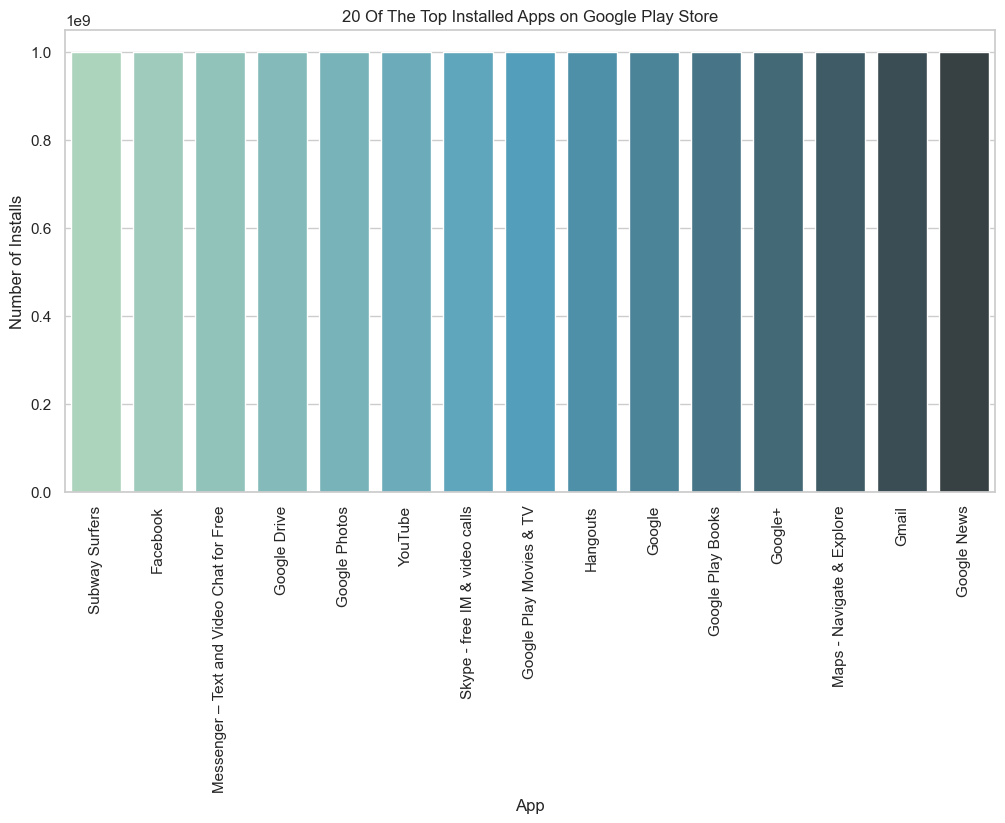

In [480]:
plt.figure(figsize=(12,6))
snb.set_style('whitegrid')
snb.barplot(x='App', y= 'Installs', data=most_intstalled_Apps, palette='GnBu_d')
plt.xticks(rotation=90)
plt.title('20 Of The Top Installed Apps on Google Play Store')

plt.ylabel('Number of Installs')
plt.show()

## top apps by installs 

In [481]:
top_10_apps = g_apps.nlargest(10, 'Installs')

In [482]:
top_20_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,index
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,0,1000000000,Free,0,Teen,Books & Reference,"August 3, 2018",Varies with device,Varies with device,152
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,335
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,336
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,0,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,338
340,Gmail,COMMUNICATION,4.3,4604324,0,1000000000,Free,0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,340
341,Hangouts,COMMUNICATION,4.0,3419249,0,1000000000,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,341
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,381
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0,1000000000,Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,382
386,Hangouts,COMMUNICATION,4.0,3419433,0,1000000000,Free,0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device,386
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,0,1000000000,Free,0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device,391


In [483]:
g_apps['App']

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10839                        The SCP Foundation DB fr nn5n
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 10841, dtype: object

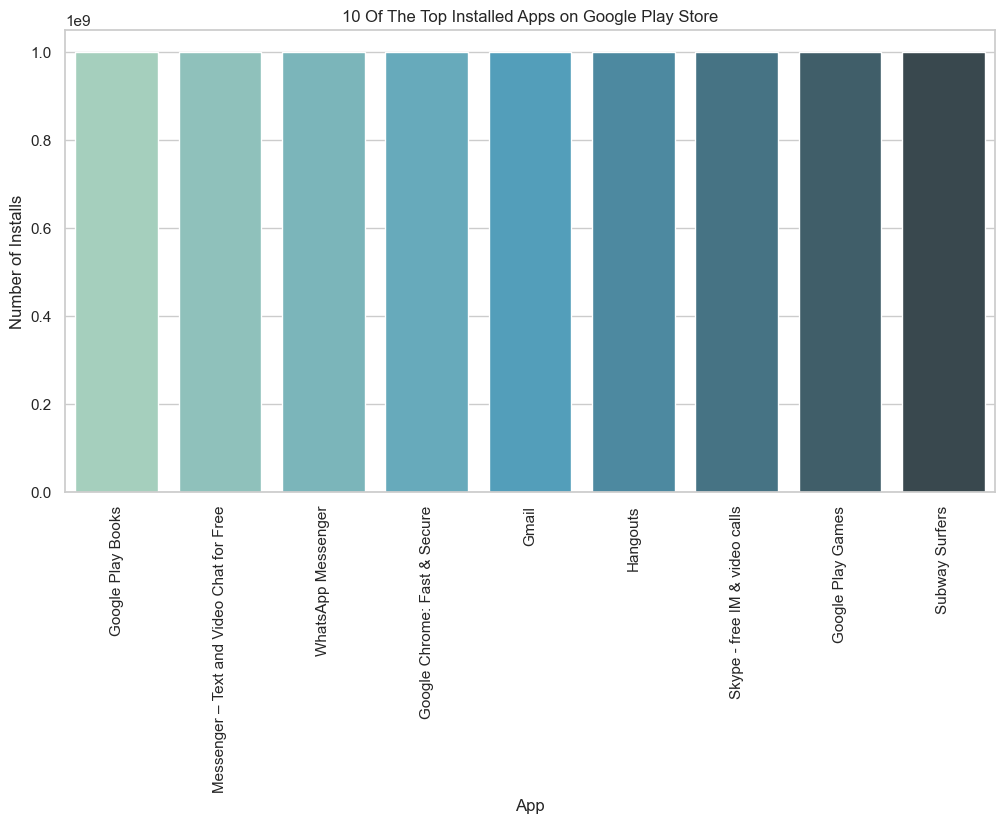

In [484]:
plt.figure(figsize=(12,6))
snb.set_style('whitegrid')
snb.barplot(x='App', y= 'Installs', data=top_20_apps, palette='GnBu_d')
plt.xticks(rotation=90)
plt.title('10 Of The Top Installed Apps on Google Play Store')

plt.ylabel('Number of Installs')
plt.show()

## categories sorted by avg installs

In [485]:
mean_installs_by_category = g_apps.groupby('Category')['Installs'].mean()

In [486]:
mean_installs_by_category_sorted = mean_installs_by_category.sort_values(ascending=False)

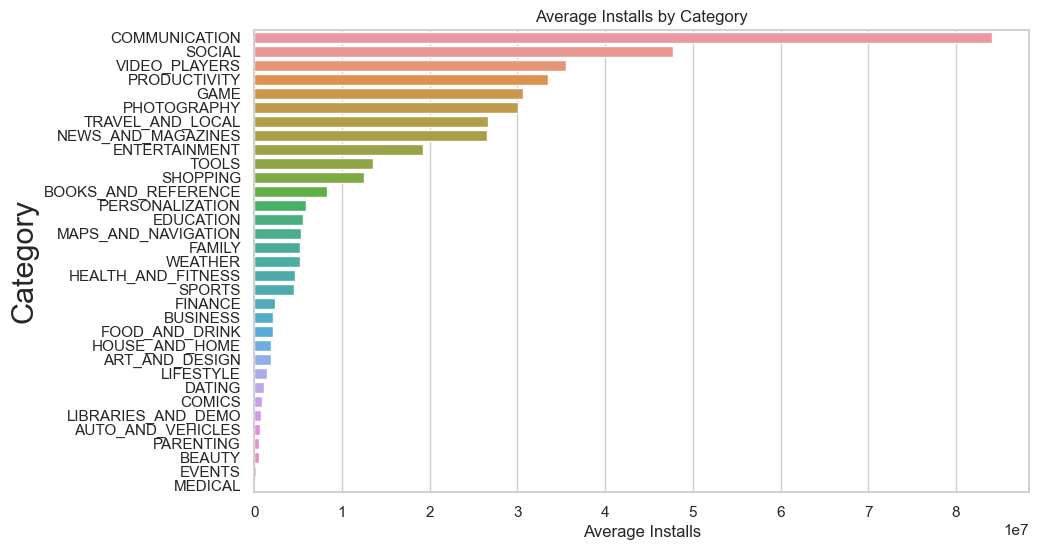

In [487]:
snb.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = snb.barplot(x=mean_installs_by_category_sorted.values, y=mean_installs_by_category_sorted.index)
ax.set_xlabel("Average Installs")
ax.set_ylabel("Category",fontsize=22)
ax.set_title("Average Installs by Category")
plt.show()

# free apps and paid apps

In [488]:
paid_app = g_apps[g_apps["Type"] == 'Paid'] 
free_app = g_apps[g_apps["Type"] == 'Free'] 

In [489]:
pc_count = paid_app["Category"].value_counts
fc_count = free_app["Category"].value_counts


## the most prevalent categories , Paid/Free apps

In [490]:
most_prevalent_paid = paid_app.groupby("Category")["Installs"].sum().sort_values(ascending=False).head(10)
most_prevalent_free = free_app.groupby("Category")["Installs"].sum().sort_values(ascending=False).head(10)

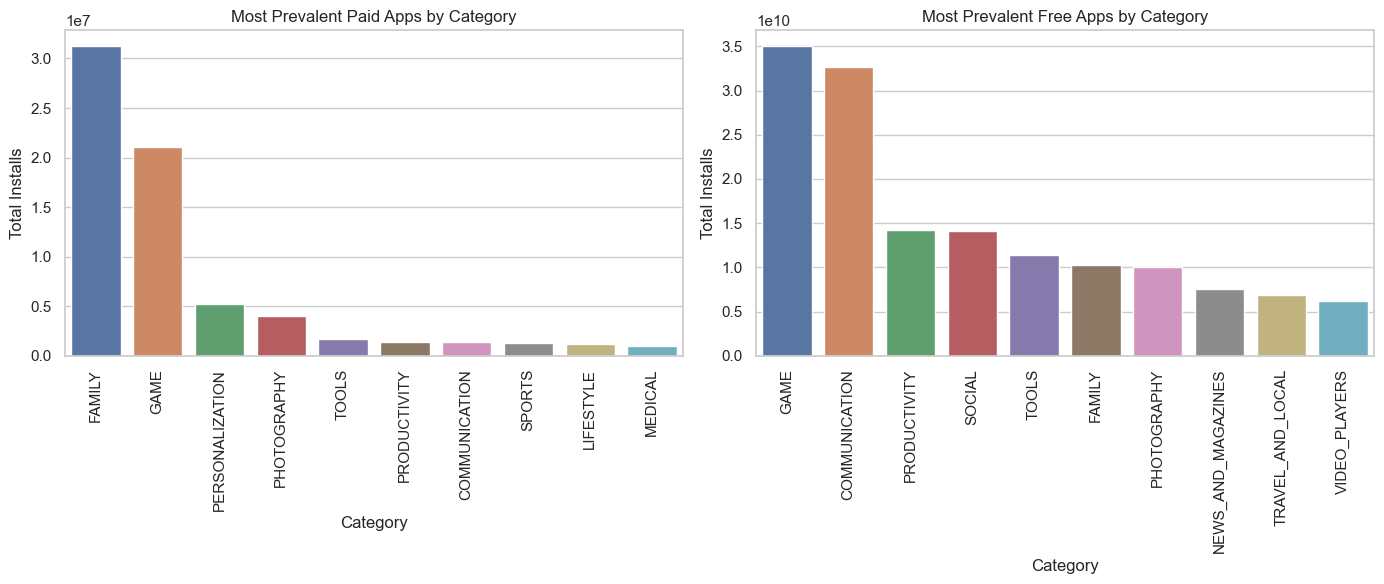

In [491]:
snb.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
snb.barplot(x=most_prevalent_paid.index, y=most_prevalent_paid.values, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_title("Most Prevalent Paid Apps by Category")
ax1.set_xlabel("Category")
ax1.set_ylabel("Total Installs")
snb.barplot(x=most_prevalent_free.index, y=most_prevalent_free.values, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
ax2.set_title("Most Prevalent Free Apps by Category")
ax2.set_xlabel("Category")
ax2.set_ylabel("Total Installs")

plt.tight_layout()
plt.show()


In [492]:
g_apps.groupby("Size").size()

Size
1.0M                     7
1.1M                    32
1.2M                    41
1.3M                    35
1.4M                    37
                      ... 
98M                     16
992k                     1
994k                     1
99M                     39
Varies with device    1695
Length: 461, dtype: int64

## converting M to KB in column size 

In [493]:

g_apps.loc[g_apps['Size'].str.endswith('M'), 'Size'] = (g_apps.loc[g_apps['Size'].str.endswith('M'), 'Size'].str[:-1].astype(float) * 1024) .astype(int)


In [529]:
g_apps['Size'] = g_apps['Size'].apply(lambda x: 0 if x == 'Varies with device' else x)
g_apps['Size'] = g_apps['Size'].apply(lambda x: 0 if x == 'M' else x)
g_apps['Size'] = g_apps['Size'].apply(lambda x: int(round(float(str(x).replace('k', '')), 0)))


In [495]:
g_apps['Size']=g_apps['Size'].astype(int)

## the smallest apps

In [496]:
smallest_apps= g_apps.sort_values(by='Size',ascending=False).head(50)

In [497]:
smallest_apps.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,index
7404,SimCity BuildIt,FAMILY,4.5,4218587,102400,50000000,Free,0.00,Everyone 10+,Simulation,"June 19, 2018",1.23.3.75024,4.0 and up,7404
3973,Hungry Shark Evolution,GAME,4.5,6071542,102400,100000000,Free,0.00,Teen,Arcade,"July 25, 2018",6.0.0,4.1 and up,3973
2299,Navi Radiography Pro,MEDICAL,4.7,11,102400,500,Paid,15.99,Everyone,Medical,"January 14, 2018",1.2.0,4.0.3 and up,2299
1793,Mini Golf King - Multiplayer Game,GAME,4.5,531458,102400,5000000,Free,0.00,Everyone,Sports,"July 20, 2018",3.04.1,4.0.3 and up,1793
5865,Gangster Town: Vice District,FAMILY,4.3,65146,102400,10000000,Free,0.00,Mature 17+,Simulation,"May 31, 2018",2.1,4.0 and up,5865


In [498]:
s_paid_app = smallest_apps[smallest_apps["Type"] == 'Paid'] 
s_free_app = smallest_apps[smallest_apps["Type"] == 'Free'] 

## from the 50 smallest apps , how mant paid? and how many free ?

In [499]:
len(s_paid_app)

4

In [500]:
len(s_free_app)

46

## the avarege installs for the smallest (paid/free) apps 

In [501]:
agv_free=s_free_app['Installs'].mean()

In [502]:
agv_free

26316848.913043477

In [503]:
agv_paid=s_paid_app['Installs'].mean()

In [504]:
agv_paid

525125.0

## the avarege installs for each app in the smallest paid apps dataframe

In [505]:
Avr_installs_paidapps = s_paid_app.groupby('App').Installs.mean()


In [506]:
Avr_installs_paidapps

App
Five Nights at Freddy's: SL                            100000.0
League of Stickman 2018- Ninja Arena PVP(Dreamsky)    1000000.0
Navi Radiography Pro                                      500.0
Stickman Legends: Shadow Wars                         1000000.0
Name: Installs, dtype: float64

## the avarege installs for each app in the smallest free apps dataframe

In [507]:
Avr_installs_freeapps=s_free_app.groupby('App').Installs.mean()

In [508]:
Avr_installs_freeapps.head(15)

App
AI Benchmark                                             5000.0
Angry Birds Blast                                    10000000.0
Angry Birds POP Bubble Shooter                       10000000.0
Arena of Valor: 5v5 Arena Game                       10000000.0
BK Dinos                                                 5000.0
Car Crash III Beam DH Real Damage Simulator 2018        10000.0
Chakra Cleansing                                        50000.0
Draft Simulator for FUT 18                            5000000.0
Earn to Die 2                                        50000000.0
Exiled Kingdoms RPG                                   1000000.0
Eyes - The Scary Horror Game Adventure               10000000.0
Gangster Town: Vice District                         10000000.0
Guns of Boom - Online Shooter                        10000000.0
Hungry Shark Evolution                              100000000.0
Idle Heroes                                          10000000.0
Name: Installs, dtype: float64

## combine free small apps and paid small apps into one dataframe 

In [509]:
free_paid_small_apps = pd.concat([Avr_installs_paidapps, Avr_installs_freeapps], axis=1)
free_paid_small_apps.columns = ['Paid', 'Free']

In [510]:
free_paid_small_apps.columns


Index(['Paid', 'Free'], dtype='object')

C:\Users\MIQDAD\AppData\Local\Temp\ipykernel_3760\3469542085.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(labels=paid_apps.index, rotation=90)
C:\Users\MIQDAD\AppData\Local\Temp\ipykernel_3760\3469542085.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(labels=free_apps.index, rotation=90)


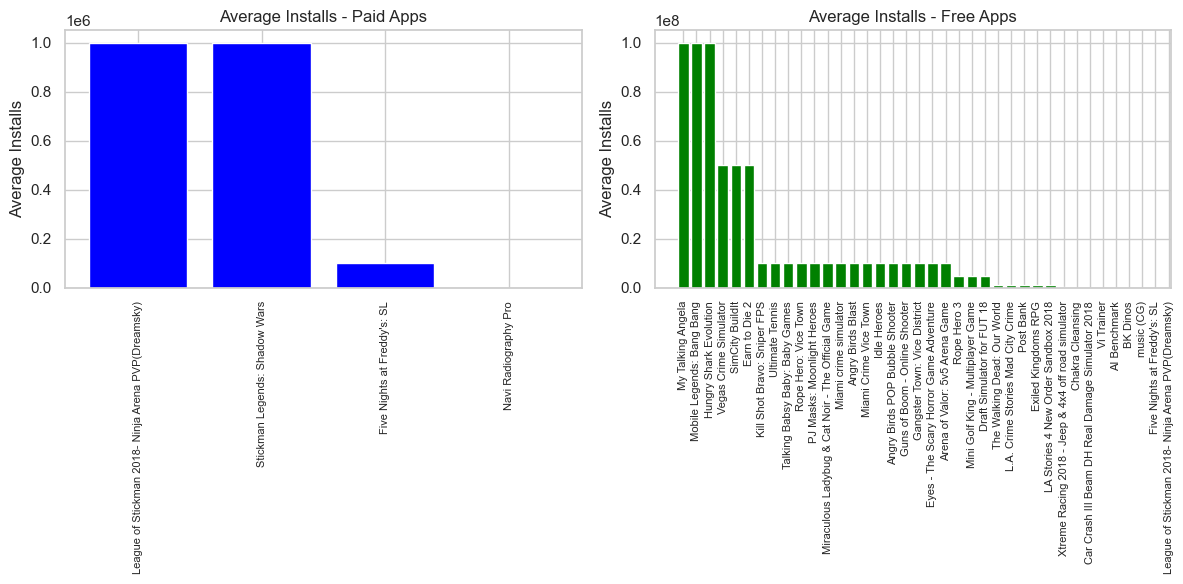

In [511]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

paid_apps = free_paid_small_apps.sort_values('Paid', ascending=False)
ax1.bar(paid_apps.index, paid_apps['Paid'], color='blue')
ax1.set_xticklabels(labels=paid_apps.index, rotation=90)
ax1.set_title("Average Installs - Paid Apps")
ax1.set_ylabel("Average Installs")

free_apps = free_paid_small_apps.sort_values('Free', ascending=False)
ax2.bar(free_apps.index, free_apps['Free'], color='green')
ax2.set_xticklabels(labels=free_apps.index, rotation=90)
ax2.set_title("Average Installs - Free Apps")
ax2.set_ylabel("Average Installs")

ax1.tick_params(axis='x', labelsize=8)
ax2.tick_params(axis='x', labelsize=8)

plt.tight_layout()

plt.show()





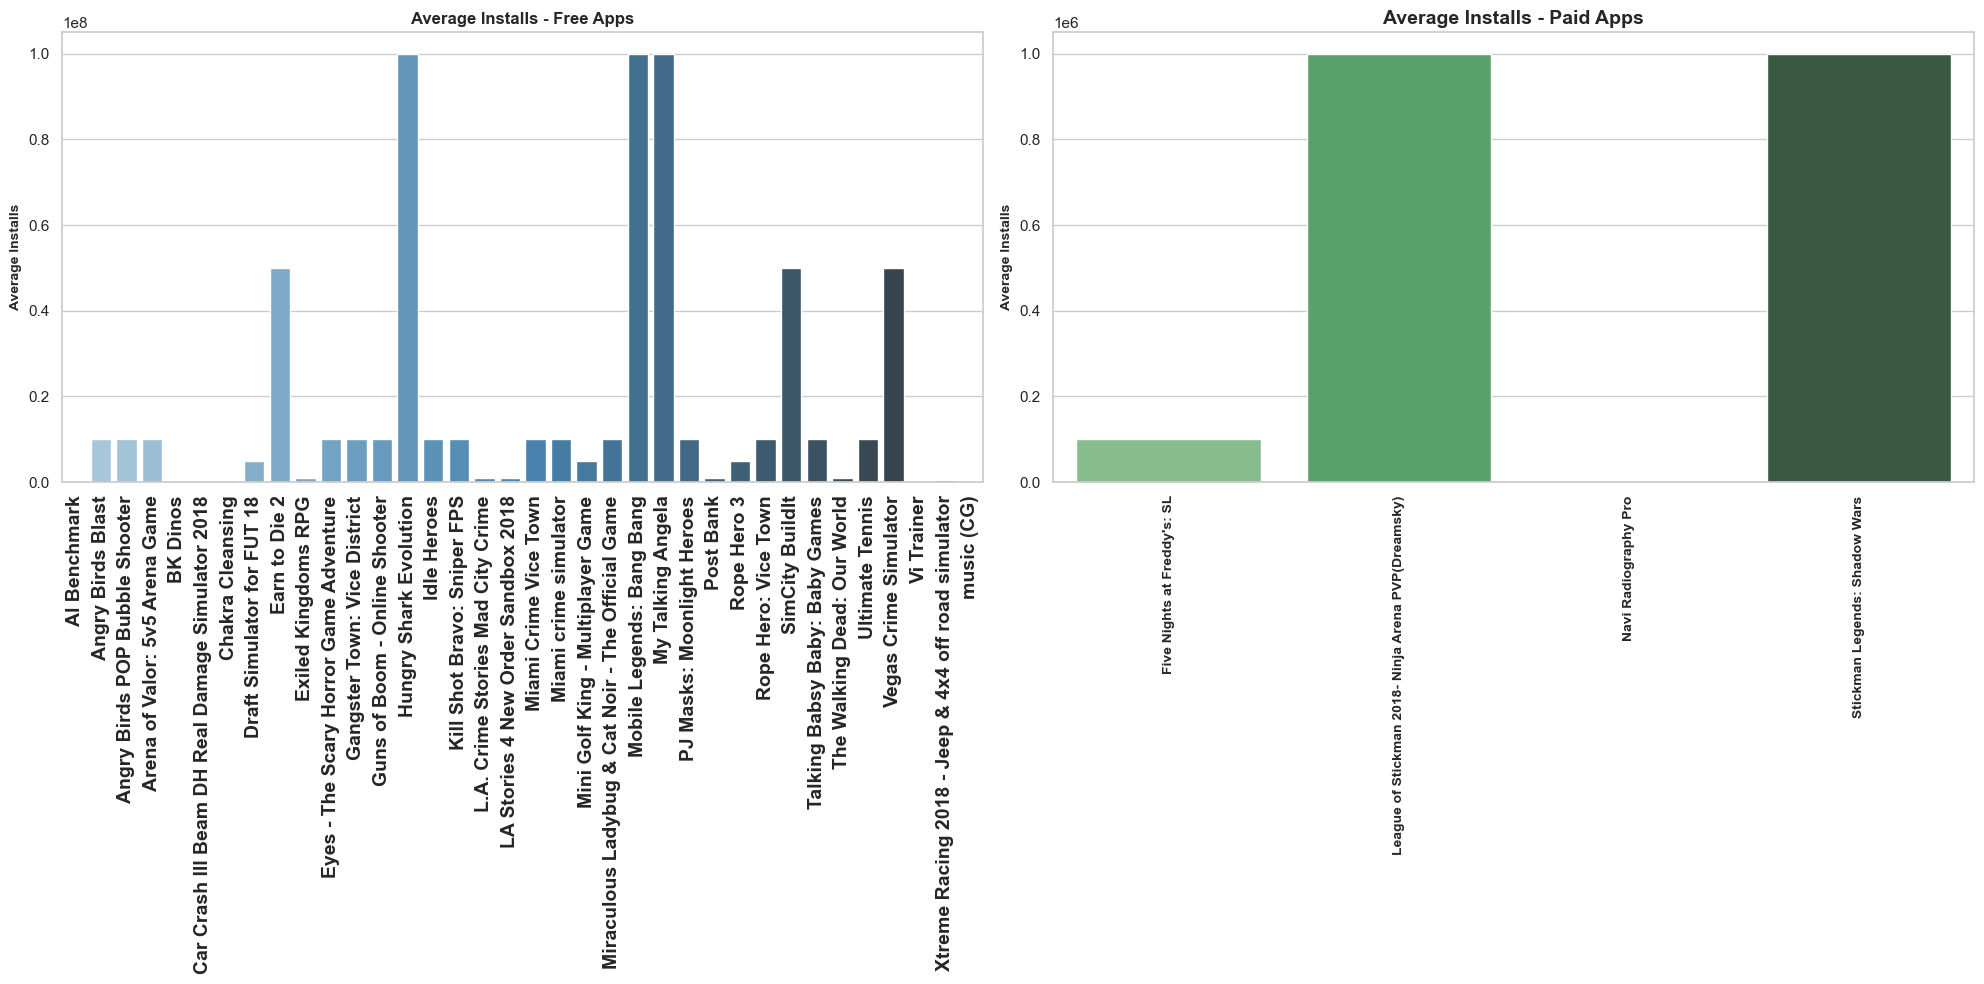

In [512]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,10))

snb.barplot(x=Avr_installs_freeapps.index, y=Avr_installs_freeapps.values, ax=ax1, palette='Blues_d')
ax1.set_xticklabels(labels=Avr_installs_freeapps.index, rotation=90, fontsize=14, fontweight='bold')
ax1.set_title("Average Installs - Free Apps", fontsize=12, fontweight='bold')
ax1.set_ylabel("Average Installs", fontsize=10, fontweight='bold')
ax1.set_xlabel("")

snb.barplot(x=Avr_installs_paidapps.index, y=Avr_installs_paidapps.values, ax=ax2, palette='Greens_d')
ax2.set_xticklabels(labels=Avr_installs_paidapps.index, rotation=90, fontsize=10, fontweight='bold')
ax2.set_title("Average Installs - Paid Apps", fontsize=14, fontweight='bold')
ax2.set_ylabel("Average Installs", fontsize=10, fontweight='bold')
ax2.set_xlabel("")

fig.tight_layout()
plt.show()


## the success depends on the high rate and the huge amount of installs

In [513]:
def success_metric(rating, installs):
    return rating * np.log(installs)

In [514]:
smallest_apps['Success'] = success_metric(smallest_apps['Rating'], smallest_apps['Installs'])

In [515]:
top_10 = smallest_apps.sort_values(by='Success', ascending=True).head(10)

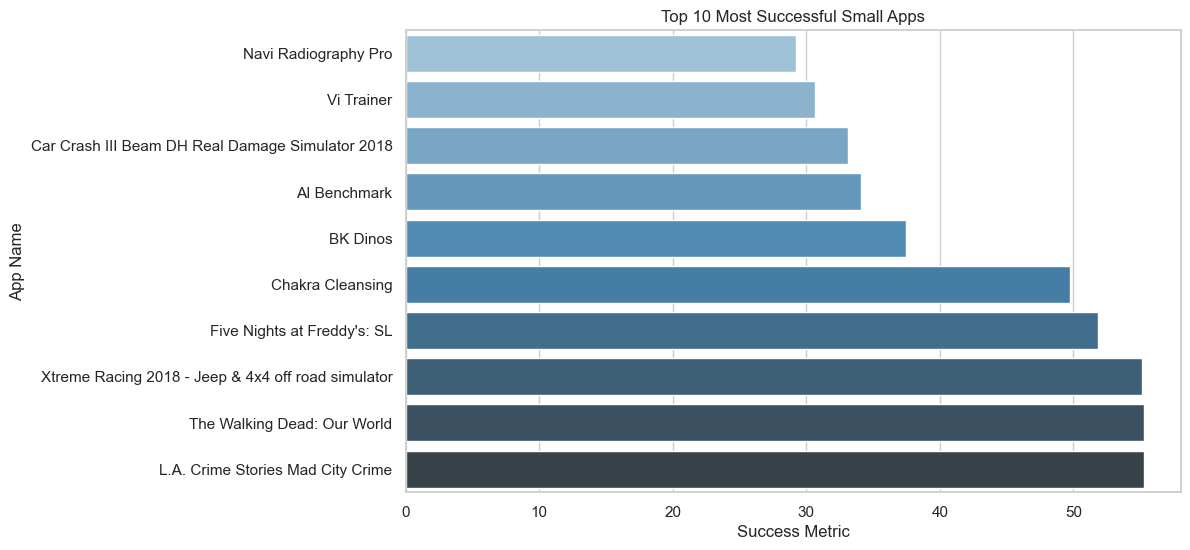

In [516]:
plt.figure(figsize=(10, 6))
ax = snb.barplot(x='Success', y='App', data=top_10, palette='Blues_d')
ax.set_title('Top 10 Most Successful Small Apps')
ax.set_xlabel('Success Metric')
ax.set_ylabel('App Name')
plt.show()

In [517]:
g_apps['Price'] = pd.to_numeric(g_apps['Price'])

In [518]:
g_apps.dtypes

App                object
Category           object
Rating             object
Reviews            object
Size                int32
Installs            int32
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
index               int64
dtype: object

In [519]:
g_apps['Price']=g_apps['Price'].astype(int)

## calculating the revenue for the smallest apps 

In [520]:
paid_app['Revenue'] = paid_app['Price'] * paid_app['Installs']

top_revenue_apps = paid_app.sort_values(by='Revenue', ascending=False).head(10)

top_revenue_apps['Category'].value_counts()

C:\Users\MIQDAD\AppData\Local\Temp\ipykernel_3760\852027458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  paid_app['Revenue'] = paid_app['Price'] * paid_app['Installs']


PHOTOGRAPHY    3
FAMILY         2
LIFESTYLE      2
GAME           2
FINANCE        1
Name: Category, dtype: int64

In [521]:
top_revenue_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,index,Revenue
4347,Minecraft,FAMILY,4.5,2375336,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,4347,69900000.0
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,"July 24, 2018",1.5.2.1,Varies with device,2241,69900000.0
5351,I am rich,LIFESTYLE,3.8,3547,1.8M,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up,5351,39999000.0
5356,I Am Rich Premium,FINANCE,4.1,1867,4.7M,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up,5356,19999500.0
4034,Hitman Sniper,GAME,4.6,408292,29M,10000000,Paid,0.99,Mature 17+,Action,"July 12, 2018",1.7.110758,4.1 and up,4034,9900000.0
7417,Grand Theft Auto: San Andreas,GAME,4.4,348962,26M,1000000,Paid,6.99,Mature 17+,Action,"March 21, 2015",1.08,3.0 and up,7417,6990000.0
5578,Sleep as Android Unlock,LIFESTYLE,4.5,23966,872k,1000000,Paid,5.99,Everyone,Lifestyle,"June 27, 2018",20180608,4.0 and up,5578,5990000.0
2912,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48M,1000000,Paid,5.99,Everyone,Photography,"July 25, 2018",1.3.1,4.1 and up,2912,5990000.0
2950,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48M,1000000,Paid,5.99,Everyone,Photography,"July 25, 2018",1.3.1,4.1 and up,2950,5990000.0
2883,Facetune - For Free,PHOTOGRAPHY,4.4,49553,48M,1000000,Paid,5.99,Everyone,Photography,"July 25, 2018",1.3.1,4.1 and up,2883,5990000.0


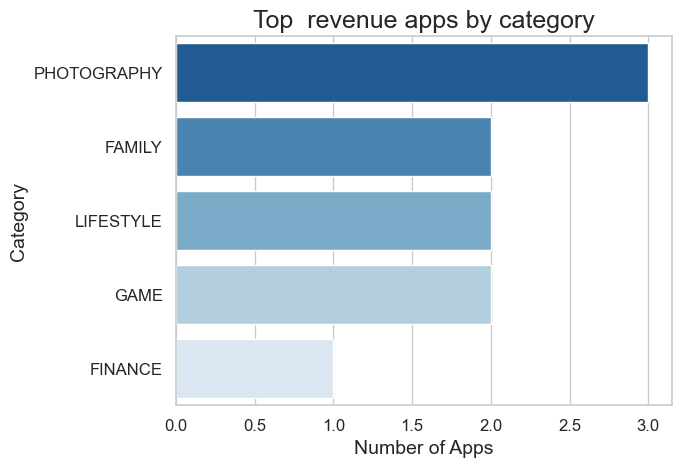

In [522]:
snb.countplot(data=top_revenue_apps, y='Category', palette='Blues_r', 
              order=top_revenue_apps['Category'].value_counts().index, )
plt.title('Top  revenue apps by category', fontsize=18)
plt.xlabel('Number of Apps', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [523]:
g_apps['Size'] = g_apps['Size'].apply(lambda x: 0 if x == 'Varies with device' else x)
g_apps['Size'] = g_apps['Size'].apply(lambda x: 0 if x == 'M' else x)
g_apps['Size'] = g_apps['Size'].apply(lambda x: int(round(float(str(x).replace('k', '')), 0)))

In [527]:
g_apps['Size']= pd.to_numeric(g_apps['Size'])

In [530]:
revenue_mean_size = top_revenue_apps["Size"].mean()

TypeError: Could not convert Varies with deviceVaries with device1.8M4.7M29M26M872k48M48M48M to numeric